In [39]:
# Import the pandas library for df creation
import pandas as pd

# Import the NumPy library to use the random package
import numpy as np

# Import the matplotlib library, package pyplot for plotting
import matplotlib.pyplot as plt

# Use magic function to render the figure in a notebook
%matplotlib inline

# Import the seaborn library for plotting
import seaborn as sns

# Sets Generator type with a declared value of 100
rng = np.random.default_rng(100)

# Set number of samples based on number of births
n = 63739

### Age

A review of data provided by the NPRS study is used here to determine how maternal age is distributed across the population - mothers with live births in 2016 (http://www.hpo.ie/latest_hipe_nprs_reports/NPRS_2017/Perinatal_Statistics_Report_2017.pdf).

While age is a numerical value it is presented by NPRS as a categorical variable/discrete groups, ranging from under 20 years of age to 45 years of age and older. The NPRS study provides the frequency and percentages of births within each group.

In [40]:
# Downloaded NPRS_Age.csv from CITE
age = pd.read_csv("Data/NPRS_Age.csv", nrows=10)

age

,Frequency,Total Births
0,Under 20,1102
1,20-24 Years,5178
2,25-29 Years,11391
3,30-34 Years,22947
4,35-39 Years,18728
5,40-44 Years,4101
6,45 Years and,292
7,Total,63739


An initial view of the NPRS data indicates that the data is somewhat normally distributed with births increasing in the 25 - 29 age group, peaking at 30 - 34 years of age and beginning to decline in the 35 - 39 age set.

In [93]:
# drop last n rows
age = age[:-1]
# Plot 
g = sns.catplot(x="Frequency", y="Total Births", data = age)

g.fig.set_figwidth(10)
g.fig.set_figheight(5)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()

ValueError: min() arg is an empty sequence

Visualising the data set supports this analysis and shows that there is a signifcant peak around 32 years of age - the midpoint of the age group with the greatest frequency of births. 

This can be replicated using a Trinangualr Distribution. This generates a random number from a weighted range by distribuing events between the maximum and minimum values provided, based on a third value that indicates what the most likely outcome will be.[54] Here we are looking for 100 events (births) distributed between the ages of 16 and 50 with a known peak where the mothers age is 32.

Here is your triangular continuous random variable:
 [29 32 33 25 34 30 26 21 23 28 25 30 29 38 36 29 32 28 30 36 47 33 37 33
 37 34 23 37 23 27 29 23 37 42 41 33 28 33 25 33 29 42 42 36 44 33 32 26
 45 31 25 28 21 37 37 27 37 28 33 28 32 34 38 32 44 35 32 28 33 24 40 26
 35 26 23 25 29 35 25 35 29 36 42 32 30 32 31 39 43 36 40 46 32 27 28 31
 27 32 45 28]


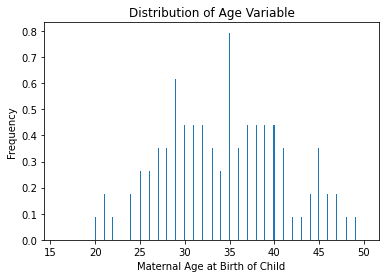

In [94]:
# Here we are looking for a random array with a lower limit of 16 an upper limit of 50
# and 32 being the number that appears most frequently (the mid point of the most frequent age group)
# over n number of instances where n is the total number of births
# and for the out to be presented on a Triangular Distribution plot

Tri_var = np.random.triangular(left = 20, mode = 30, right = 50, size = 100).astype(int)
print ("Here is your triangular continuous random variable:\n % s" % (Tri_var)) # [55]

#  https://stackoverflow.com/questions/60870070/a-weighted-version-of-random-randint
plt.hist(np.ma.round(np.random.triangular(left = 20, mode = 30, right = 50, size = 100)).astype(int),
        range = (16, 50), bins = 300, density = True)

plt.title('Distribution of Age Variable')
plt.xlabel('Maternal Age at Birth of Child')
plt.ylabel('Frequency')
plt.show()

In [95]:
# intialise data of lists.
data = {'Age Group':['Under 20', '20-24 Years', '25-29 Years', '30-34 Years',
                    '35-39 Years', '40-44 Years', '45 Years and Over'],
        'Age':[]}
 
# Create DataFrame with single column for Age
df = pd.DataFrame((np.random.triangular(left = 20, mode = 30, right = 50, size = 100)).astype(int), columns=['Age'])
 
# Print the output.
print(df)

    Age
0    37
1    25
2    30
3    34
4    35
..  ...
95   27
96   39
97   42
98   37
99   42

[100 rows x 1 columns]


### Martial Status

In [7]:
# Classifying Martial Status
# 'single' if single, 'married' if married and 'other' for all other categories
marital_status = ['single', 'married', 'other']

# CITE
marital_status = rng.choice(marital_status, n, p=[0.22, 0.72, 0.06])

# CITE
print("Single: ", np.count_nonzero(marital_status == 'single'))
print("Married: ", np.count_nonzero(marital_status == 'married'))
print("Other: ", np.count_nonzero(marital_status == 'other'))

Single:  14096
Married:  45739
Other:  3904


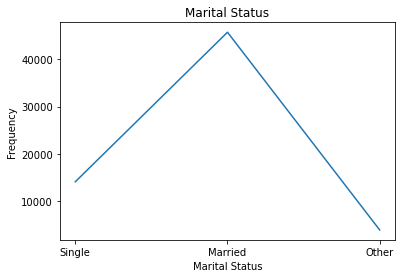

In [15]:
# Plot the distribution of marital_status values

x = ["Single", "Married", "Other"]
y = [14096, 45739, 3904]

plt.plot(x, y)
plt.xlabel("Marital Status") 
plt.ylabel("Frequency") 
plt.title("Marital Status") 
plt.show() 


### Health Insurance Status